# Statistical analysis of incident probability and causes on RATP metro lines

## Methodology

The official RATP Twitter accounts frequently update operational status of their lines like the following one. In this case, at 16:46 the line 1 account reports an operational incident (the line is cut between two stations) due to a technical problem (very strange one...they have some difficulty managing the line 😂)

<img width="450" src="https://user-images.githubusercontent.com/4027283/52820320-f9343580-30ab-11e9-8f15-4f337cd4a4ae.png">

With the Python script contained in this notebook, the three *highlighted* information in this tweet is post-processed and converted to a line inside a pandas dataframe (a table) containing mainly three columns:

1. `time`: every day is evenly divided into 30 minutes intervals: 00:00 – 00:30, 00:30 - 01:00, ..., 23:30 – 24:00.
2. `is_incident`: if an incident (or more) is reported during this period.
3. `incident_cause`: the cause of the incident. In case of several incidents, record the most frequent cause. In general it's rare to have two separate incidents of different nature within 15 minutes.

| `time`                   | `is_incident` | `incident_cause` |
| ------------------------ | ------------- | ---------------- |
| ...                      |               |                  |
| 2019-02-14 16:00 – 16:30 | `False`       | N/A              |
| 2019-02-14 16:30 – 17:00 | `True`        | technique        |
| 2019-02-14 17:00 – 17:30 | `False`       | N/A              |
| ...                      |               |                  |

In this case, no more incidents are reported (such as *le trafic **reste** perturbé*) in the period 17:00 to 17:30, hence we assume that the traffic is back to normal. Since the time of incident is recorded to be only accurate up to 30 minutes, the statistical results reported below should be interprepted with caution. For instance, if I announce that in the hour 17:00 – 18:00 the probability of encountering incidents on metro line 2 is 3%, that's all...I have no further statistical information on when exactly the incident may happen MORE LIKELY in that hour. It may happen that actually more incidents may take place from 17:44 to 18:00, but no estimation can be made with the current design.

## Source code

Feel free to skip if you do not want to know the details.

The source code is in the `ratpmetro` folder. It mainly depends on the following Python libraries: `pandas` (for data analysis), `tweepy` (for downloading tweets) and `matplotlib` (for visualization). Its documentation can be found [here](http://ratpmetro.readthedocs.io).

To begin with, import the `RATPMetroTweetsAnalyzer` class.

In [1]:
from ratpmetro import RATPMetroTweetsAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
%matplotlib inline

## First example with the RATP metro line 9

We will first take an example of the metro line 9 (which I took when I need to go to Dassault Systèmes for my work), within the year 2021. In the `RATPMetroTweetsAnalyzer` class, you can find a pandas dataframe `df` containing the raw tweets downloaded from the official RATP Twitter account. After processing (using the method `process()`) two additional columns will appear

1. `is_incident`: whether the current tweet reports an incident (True or False)
2. `incident_cause`: the cause of this incident

An example with the last 10 tweets.

In [2]:
ratp = RATPMetroTweetsAnalyzer()
ratp.load(line=9)
ratp.process()
ratp.df.tail(10)

,tweet,is_incident,incident_cause
time,,,
2022-02-01 18:39:46+01:00,✅Le trafic est rétabli de Marcel Sembat vers M...,False,N/A
2022-02-02 10:16:22+01:00,[#MobilisésEnsemble] Pour voyager sereinement ...,False,N/A
2022-02-03 09:26:40+01:00,@RobaloSilvio Bonjour Silvio. Je vous confirme...,False,N/A
2022-02-03 09:35:29+01:00,@RobaloSilvio Je vous en prie 😊,False,N/A
2022-02-03 10:42:52+01:00,[👜 Bagage oublié] Lorsque vous montez ou desce...,False,N/A
2022-02-03 12:05:59+01:00,RT @Ligne8_RATP: [#JeudiPhoto 📸] Avez-vous ape...,False,N/A
2022-02-04 09:57:31+01:00,[#travaux #ligne9] Afin de procéder au renouve...,False,N/A
2022-02-05 05:58:42+01:00,⚠️ Trafic perturbé en direction de Mairie de M...,True,technique
2022-02-05 06:58:45+01:00,⚠️ Trafic perturbé sur l'ensemble de la #ligne...,True,technique


### Mean probability of operational incidents

The average probability of encountering incidents in the year 2021 is expected to be 1.8%.

In [3]:
ratp.incident_prob(year=2021)

0.01780821917808219

### Variation in the probability of incidents

The probability of encountering problems is by no means a constant value. Around 04:00 all metro systems are closed so it's impossible to catch one! In the meanwhile at rush hours you are more likely to hate RATP metros. That's why we propose a `plot_prob(by="hour", year=None)` method capable of plotting (aggregated, marginal) probability variation with respect to a given variable.

#### By hour

Here the value refers in fact to the next following hour starting from this value. For example, the value of 9 below refers to the hour begining from 09:00 to 09:59.

1. As said before it's natural to have lower probabilities of having problems when everyone sleeps (from 02:00 to 04:00): even the metro does!
2. We get a first peak in the morning at 08:00, where the probability of having problems attains approximately 2.8%.
3. The probability of catching an incident is maximal (up to 3%) from 16:00 to 18:59.

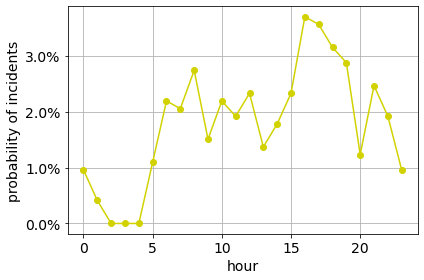

In [4]:
ratp.plot_incident_prob(by="hour", year=2021)
plt.tight_layout()

#### By weekday

1. On Thursday I may have more problems on the line 9.
2. It's better to take the line 9 on weekends..

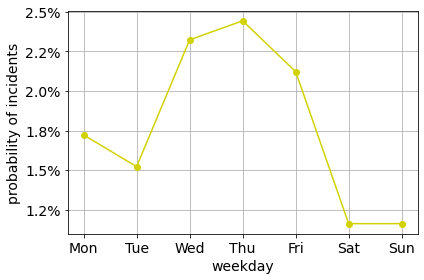

In [5]:
ratp.plot_incident_prob(by="weekday", year=2021)
plt.tight_layout()

#### By hour-weekday

This representation is more accurate as it tells us the probability of incidents for a given hour (in fact in the next following hour) and a specific weekday.

1. Black Friday 😂 from 18:00 to 19:00, as there is up to 8% chance that the line 9 will not work properly!
2. Also lots of problems on Thursday overall...

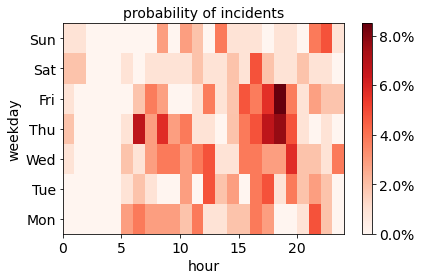

In [31]:
ratp.plot_incident_prob(by="hour-weekday", year=2021)
plt.tight_layout()
plt.savefig("hour_weekday_9.png", dpi=300)

#### By month

1. In April and in Augest there are less problems...
2. In October never take line 9 😂

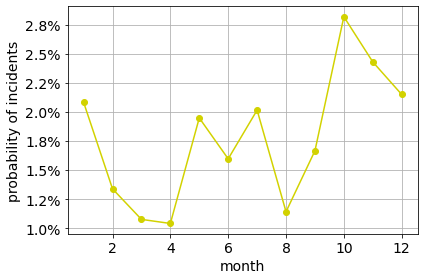

In [8]:
ratp.plot_incident_prob(by="month", year=2021)
plt.tight_layout()

#### By month-weekday

1. No comments...

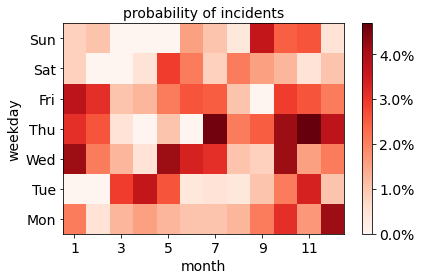

In [9]:
ratp.plot_incident_prob(by="month-weekday", year=2021)
plt.tight_layout()

#### By year

1. In 2020 due to COVID-19 there were less problems!
2. In 2022 back to normal 😂

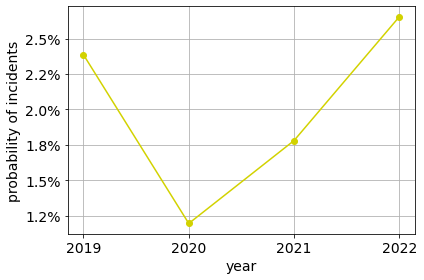

In [10]:
ratp.plot_incident_prob(by="year")
plt.xticks([2019, 2020, 2021, 2022])
plt.tight_layout()

#### By month-year

1. When data is not available, the case will be blank
2. Indeed in 2020 there were less problems...

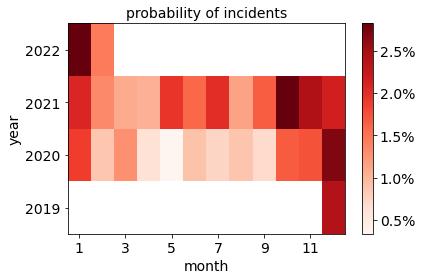

In [32]:
ratp.plot_incident_prob(by="month-year")
plt.tight_layout()
plt.savefig("month_year_9.png", dpi=300)

### Most frequent incidents causes

It seems that 30% of the incidents come from passengers. Also, 24% is due to unattended personal affairs (colis)...

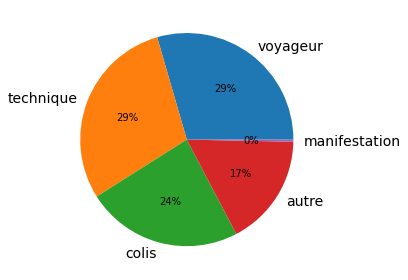

In [33]:
ratp.plot_incident_cause(year=2021)
plt.tight_layout()
plt.savefig("incident_cause_9.png", dpi=300)

## All RATP metro lines

We will now perform similar analyses on all RATP metro lines.

### Rankings in terms of their mean probability of incidents

1. In the year 2020, the winner is line 13 (no surprise for Parisians...).
2. In 2021, 4, 6 and 7 were worse than 13...
3. Apprently there were less problems in 1, 10 and 11.

In [13]:
lines = np.arange(1, 15)
ratp_line = {}
for i, line in enumerate(lines):
    ratp_line[line] = RATPMetroTweetsAnalyzer()
    ratp_line[line].load(line=int(line))
    ratp_line[line].process()

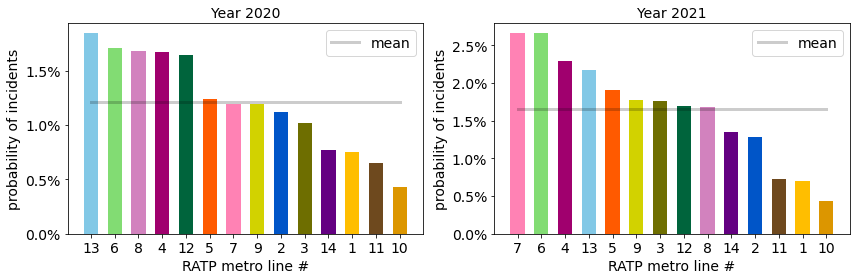

In [30]:
def plot_ranking(year):
    incident_prob = np.zeros(len(lines))
    color = [None] * len(lines)
    for i, line in enumerate(lines):
        incident_prob[i] = ratp_line[line].incident_prob(year=year)
        color[i] = ratp_line[line].color

    idx = np.argsort(incident_prob)[::-1]  # descending order
    x = lines[idx]
    y = incident_prob[idx]
    color = np.array(color)[idx]
    plt.bar(lines, y, width=0.6, color=color)

    mean = incident_prob.mean()
    plt.plot((lines.min(), lines.max()), (mean, mean), "k-", linewidth=3, alpha=0.2, label="mean")

    plt.xticks(lines, x)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1%}"))
    plt.xlabel("RATP metro line #")
    plt.ylabel("probability of incidents")
    plt.legend()
    plt.title(f"Year {year:d}")
    
    return incident_prob

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_ranking(2020)
plt.subplot(1, 2, 2)
incident_prob = plot_ranking(2021)
plt.tight_layout()
plt.savefig("ranking_2020_2021.png", dpi=300)

### Hour-weekday plot for each line

1. For comparison purposes the maximum probability in the colorbars is fixed to 10%. 1, 10 and 11 are nearly blank, indicating that the probability of incidents is low. 4, 6, 7 and 13 on the other hand are redder...

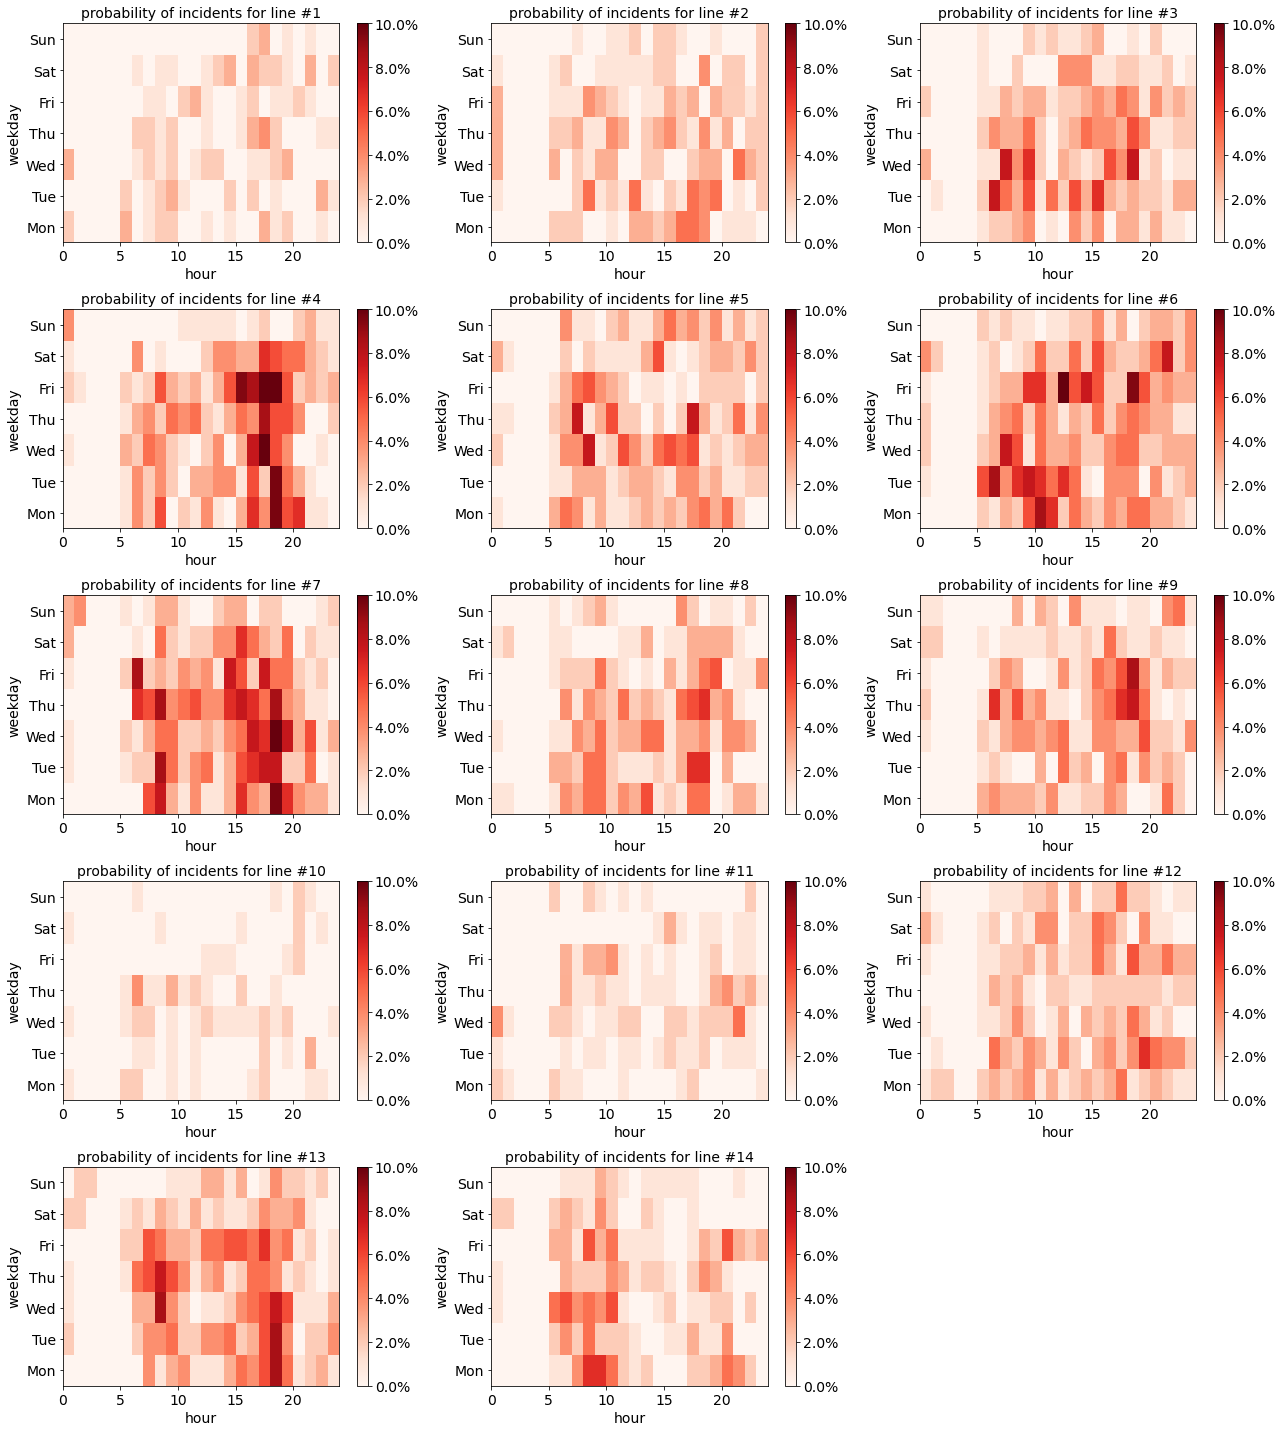

In [15]:
c_mean = np.zeros((len(lines), 24, 7))
plt.figure(figsize=(18, 20))
for i, line in enumerate(lines):
    plt.subplot(5, 3, i + 1)
    xx, yy, c_mean[i] = ratp_line[line].plot_incident_prob(by="hour-weekday", year=2021, vmax=0.1)
    plt.title(plt.gca().get_title() + " for line #" + str(line))

plt.tight_layout()

### Mean hour-weekday plot

1. In each hour-weekday block we calculate and plot here the average probability among all lines.
2. It seems like that, the worst timing to take metro is from 18:00 to 19:00...Logic!!

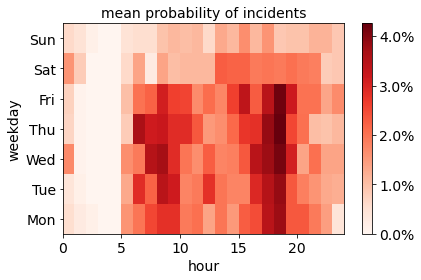

In [29]:
plt.pcolormesh(xx, yy, c_mean.mean(axis=0), cmap="Reds")
plt.yticks(np.linspace(0.5, 6.5, 7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("hour")
plt.ylabel("weekday")
plt.colorbar(format=FuncFormatter(lambda y, _: "{:.1%}".format(y)))
plt.title("mean probability of incidents")
plt.tight_layout()
plt.savefig("mean_hour_weekday.png", dpi=300)

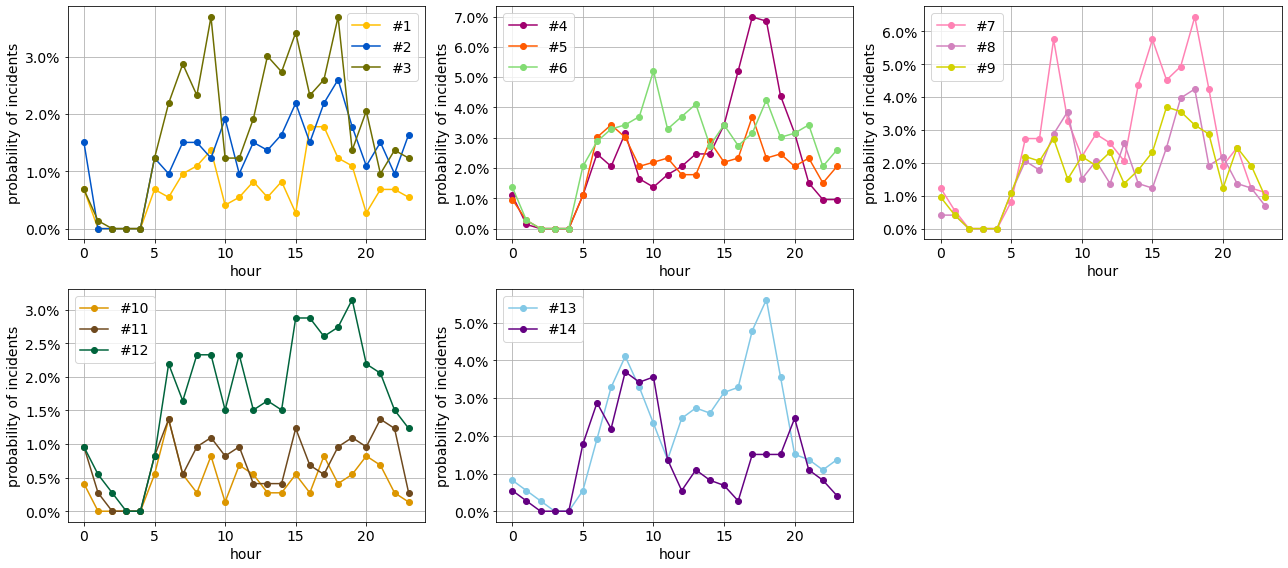

In [17]:
plt.figure(figsize=(18, 8))
lines_split = np.array_split(lines, 5)
incident_prob_hour_line = np.zeros((len(lines), 24))
for i, split in enumerate(lines_split):
    plt.subplot(2, 3, i + 1)
    for line in split:
        x, incident_prob_hour_line[line - 1] = ratp_line[line].plot_incident_prob(by="hour", year=2021)
    plt.legend(["#" + str(x) for x in split])

plt.grid()
plt.tight_layout()

### Mean probability of incidents by hour among all lines

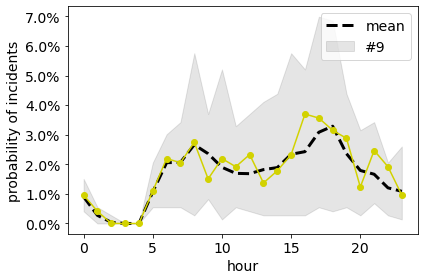

In [19]:
incident_prob_hour_line_mean = incident_prob_hour_line.mean(axis=0)
incident_prob_hour_line_min = incident_prob_hour_line.min(axis=0)
incident_prob_hour_line_max = incident_prob_hour_line.max(axis=0)
hour = range(24)
plt.plot(hour, incident_prob_hour_line_mean, "k--", linewidth=3)
plt.fill_between(hour, incident_prob_hour_line_min, incident_prob_hour_line_max, color="k", alpha=0.1)

ratp_line[9].plot_incident_prob(by="hour", year=2021)

plt.legend(["mean", "#9"])
plt.grid()
plt.tight_layout()

## Further analyses

### More incidents at rush hours?

The rush hours are defined as from 08:00 to 09:59 and from 17:00 to 19:59. 

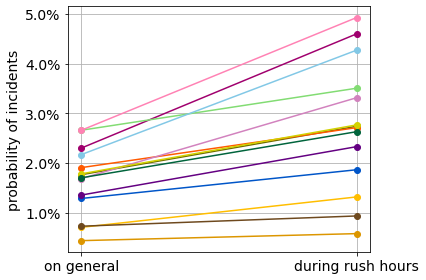

In [23]:
def plot_bar_comparison(mask_string, label, year=2021):
    mask = np.zeros_like(incident_prob)
    for i, line in enumerate(lines):
        df = ratp_line[line]._df_processed_loc(year=year)
        mask[i] = df[eval(mask_string)]["is_incident"].mean()

    all_mean = incident_prob.mean()
    all_min = incident_prob.min(); all_min_who = incident_prob.argmin() + 1
    all_max = incident_prob.max(); all_max_who = incident_prob.argmax() + 1
    mask_mean = mask.mean()
    mask_min = mask.min(); mask_min_who = mask.argmin() + 1
    mask_max = mask.max(); mask_max_who = mask.argmax() + 1
    yerr = np.array([[all_mean - all_min, mask_mean - mask_min],
                     [all_max - all_mean, mask_max - mask_mean]])
    x = [0, 1]
    dx = 0.02
    dy = 0.001
    plt.bar(x, [all_mean, mask_mean], width=0.4, yerr=yerr, color=["C0", "C1"])
    plt.text(x[0] + dx, all_min + dy, f"#{all_min_who}", fontsize=14)
    plt.text(x[0] + dx, all_max - dy, f"#{all_max_who}", fontsize=14)
    plt.text(x[1] + dx, mask_min + dy, f"#{mask_min_who}", fontsize=14)
    plt.text(x[1] + dx, mask_max - dy, f"#{mask_max_who}", fontsize=14)

    plt.xticks(x, ["on general", label])
    plt.ylabel("probability of incidents")
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:.1%}".format(x))) 
    plt.tight_layout()

def plot_parallel_comparison(mask_string, label, year=2021):
    x = [0, 1]
    for line in lines:
        df = ratp_line[line]._df_processed_loc(year=year)
        mask = df[eval(mask_string)]["is_incident"].mean()
        plt.plot(x, [incident_prob[line - 1], mask], "-o", color=ratp_line[line].color)

    plt.xticks(x, ["on general", label])
    plt.ylabel("probability of incidents")
    plt.grid()
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:.1%}".format(x))) 
    plt.tight_layout()

plot_parallel_comparison("df['hour'].isin([8, 9, 17, 18, 19])", "during rush hours")

### Less incidents during weekend?

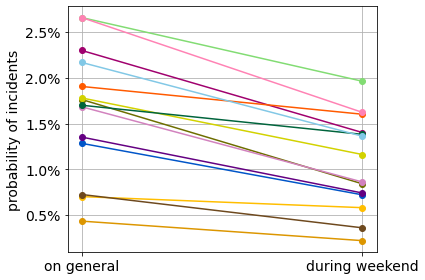

In [24]:
plot_parallel_comparison("df['weekday'].isin([5, 6])", "during weekend", year=2021)

### Less incidents during vacations?

In general less (Parisian) people in May, July and August...

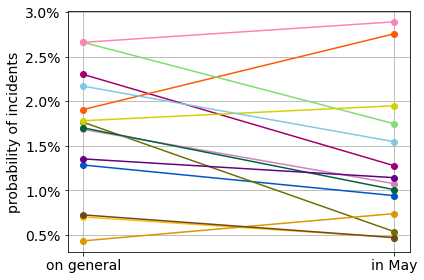

In [25]:
plot_parallel_comparison("df['month'] == 5", "in May", year=2021)

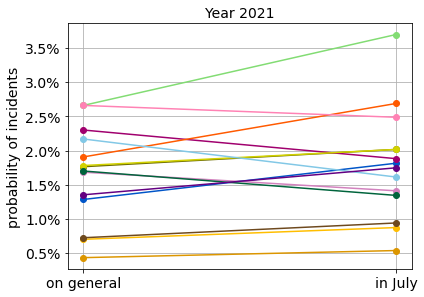

In [36]:
plot_parallel_comparison("df['month'] == 7", "in July", year=2021)
plt.title("Year 2021")
plt.savefig("in_july.png", dpi=300)

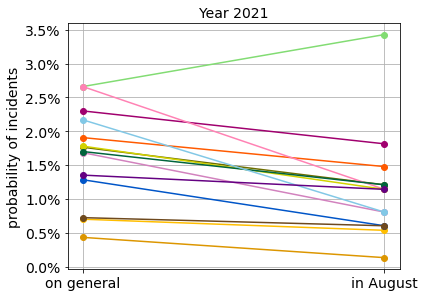

In [37]:
plot_parallel_comparison("df['month'] == 8", "in August", year=2021)
plt.title("Year 2021")
plt.savefig("in_auguest.png", dpi=300)